# Chargement des données d’images

Jusqu’à présent, nous avons travaillé avec des ensembles de données assez artificiels, peu représentatifs des projets réels.  
Dans la pratique, vous serez souvent amené à manipuler des **images de grande taille**, comme celles issues d’appareils photo ou de téléphones portables.  
Dans ce notebook, nous verrons comment **charger des images** et les utiliser pour **entraîner des réseaux de neurones**.

Nous utiliserons un [jeu de données de photos de chats et de chiens](https://www.kaggle.com/c/dogs-vs-cats) disponible sur **Kaggle**.  
Voici quelques exemples d’images :



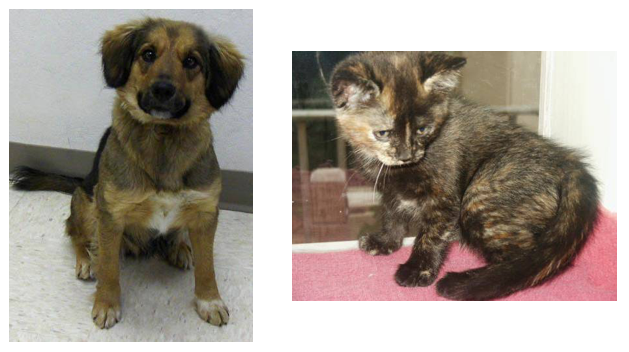

Nous emploierons ce jeu de données pour entraîner un réseau de neurones capable de **distinguer les chats des chiens**.  
Aujourd’hui, cela peut sembler banal, mais il y a encore quelques années, c’était un véritable **défi pour les systèmes de vision par ordinateur**.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper


La façon la plus simple de charger des images est d’utiliser `datasets.ImageFolder` de la bibliothèque **torchvision** ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)).  
En général, vous utiliserez `ImageFolder` comme ceci :

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
````

où `'path/to/data'` est le chemin d’accès au répertoire contenant les données, et `transform` est une **séquence d’opérations de prétraitement** définies à l’aide du module [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) de `torchvision`.

`ImageFolder` s’attend à une structure de répertoires comme celle-ci :

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

Chaque classe (ici `cat` et `dog`) possède son **propre dossier** contenant les images correspondantes.
Les images sont alors automatiquement **étiquetées** d’après le nom du dossier.
Ainsi, l’image `123.png` sera chargée avec l’étiquette `cat`.

Vous pouvez télécharger le jeu de données déjà structuré de cette manière [ici](https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip).
Il est déjà séparé en **jeu d’entraînement** et **jeu de test**.

---

### 🔄 Transformations

Lors du chargement des données avec `ImageFolder`, il faut définir des **transformations (transforms)**.
Par exemple, les images ont des tailles différentes, mais le modèle nécessite qu’elles aient toutes la même taille pour l’entraînement.
On peut donc :

* les **redimensionner** avec `transforms.Resize()`, ou
* les **rogner** avec `transforms.CenterCrop()` ou `transforms.RandomResizedCrop()`.

Il faut également **convertir les images en tenseurs PyTorch** à l’aide de `transforms.ToTensor()`.

En général, ces étapes sont combinées en un pipeline à l’aide de `transforms.Compose()`, qui exécute une liste de transformations dans l’ordre.
Par exemple, pour redimensionner, recadrer, puis convertir en tenseur :

```python
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
```

Il existe de nombreuses autres transformations possibles — consultez la [documentation](http://pytorch.org/docs/master/torchvision/transforms.html) pour plus de détails.

---

### 📦 Data Loaders

Une fois le `ImageFolder` chargé, il faut le passer à un [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader).
Le **DataLoader** prend un dataset (par exemple celui renvoyé par `ImageFolder`) et retourne des **lots (batches)** d’images et leurs **étiquettes** correspondantes.
Vous pouvez régler plusieurs paramètres, comme :

* la **taille des lots (`batch_size`)**,
* et le **mélange des données (`shuffle`)** à chaque époque.

Exemple :

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

L’objet `dataloader` est un **générateur**.
Pour extraire des données, on peut soit boucler dessus, soit le convertir en itérateur et appeler `next()` :

```python
# Boucle pour récupérer un batch à chaque itération
for images, labels in dataloader:
    pass

# Obtenir un seul batch
images, labels = next(iter(dataloader))
```

---

> **Exercice :**
> Chargez les images depuis le dossier `Cat_Dog_data/train`,
> définissez quelques transformations,
> puis construisez le **DataLoader**.



In [2]:
# setting working Directory
import os
os.chdir(r"C:\Users\USER\Desktop\cnn_catsdogs_MariemeFaye\Cat_Dog_data")

In [3]:
%ls

 Le volume dans le lecteur C s'appelle OS
 Le num�ro de s�rie du volume est 6C27-3513

 R�pertoire de C:\Users\USER\Desktop\cnn_catsdogs_MariemeFaye\Cat_Dog_data

20/10/2025  08:29    <DIR>          .
20/10/2025  08:08    <DIR>          ..
14/10/2025  06:27             6�148 .DS_Store
14/10/2025  06:27    <DIR>          test
14/10/2025  06:28    <DIR>          train
               1 fichier(s)            6�148 octets
               4 R�p(s)   3�922�243�584 octets libres


In [ ]:
# extract Cat_Dog_data.zip
#!unzip Cat_Dog_data.zip

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_dir = (r"C:\Users\USER\Desktop\cnn_catsdogs_MariemeFaye\Cat_Dog_data\train")  # adapte 

transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

c:\Users\USER\Desktop\cnn_catsdogs_MariemeFaye\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


<Axes: >

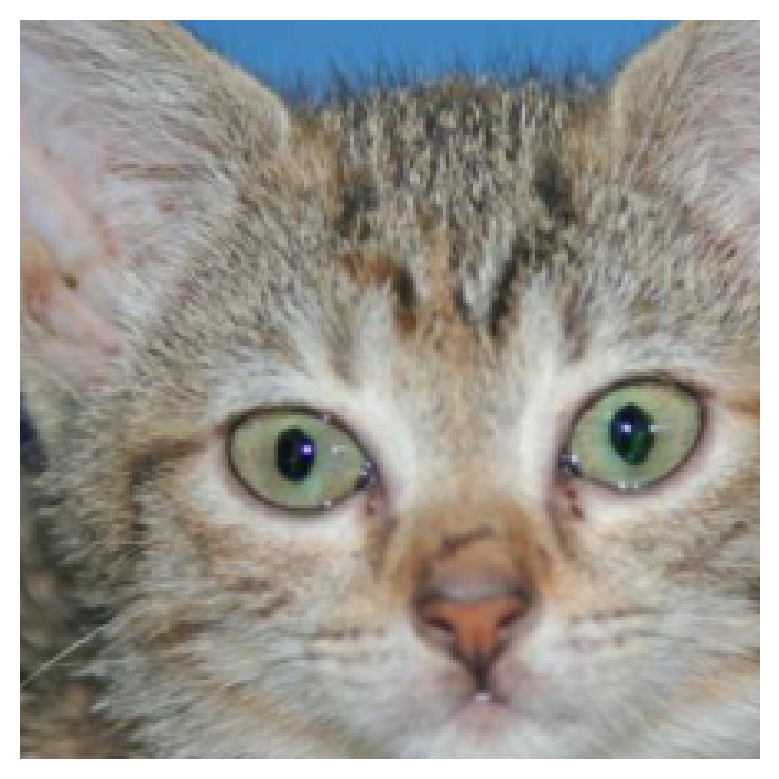

In [8]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)


## Augmentation de Données

Une stratégie courante pour entraîner des réseaux de neurones consiste à introduire une **certaine forme d’aléatoire dans les données d’entrée**.  
Par exemple, on peut faire tourner, refléter, redimensionner et/ou rogner aléatoirement les images pendant l’entraînement.  
Cela aide le réseau à **mieux généraliser**, car il voit les mêmes images sous différentes formes : positions, tailles, orientations, etc.

Pour appliquer une rotation, un recadrage et un redimensionnement aléatoires, puis retourner les images horizontalement, on peut définir les transformations ainsi :

```python
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])
````

Il est également recommandé de **normaliser les images** à l’aide de `transforms.Normalize`.
Cette transformation prend en entrée :

* une liste de **moyennes** (`mean`)
* et une liste d’**écarts-types** (`std`)

Chaque canal de couleur est alors normalisé selon la formule :

```
input[channel] = (input[channel] - mean[channel]) / std[channel]
```

Soustraire la moyenne recentre les données autour de zéro,
et diviser par l’écart-type comprime les valeurs entre **-1 et 1**.
Cette normalisation aide à maintenir les **poids du réseau proches de zéro**,
rendant ainsi la **rétropropagation plus stable**.
Sans normalisation, le réseau risque souvent d’échouer à apprendre correctement.

Vous pouvez consulter la **liste complète des transformations disponibles** [ici](http://pytorch.org/docs/0.3.0/torchvision/transforms.html).

Lors des phases de **validation** ou de **test**, on utilise généralement des images **non altérées** (hormis la normalisation).
Ainsi, pour les données de validation ou de test, on se contente en général de **redimensionner** et **recadrer** les images.

---

> **Exercice :**
> Définissez ci-dessous les **transformations** pour les données d’entraînement et de test.
> Ne mettez pas encore la normalisation.

```



In [9]:
from torchvision import datasets, transforms
import torch
from torch.utils.data import DataLoader

data_dir = (r"C:\Users\USER\Desktop\cnn_catsdogs_MariemeFaye\Cat_Dog_data")

# TODO: Define transforms for the training data and testing data (sans normalisation)
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data  = datasets.ImageFolder(data_dir + '/test',  transform=test_transforms)

trainloader = DataLoader(train_data, batch_size=32, shuffle=True,  num_workers=2, pin_memory=True)
testloader  = DataLoader(test_data,  batch_size=32, shuffle=False, num_workers=2, pin_memory=True)



In [10]:
# change this to the trainloader or testloader
data_iter = iter(trainloader)

c:\Users\USER\Desktop\cnn_catsdogs_MariemeFaye\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [20]:
images, labels = next(data_iter)
labels

tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1])

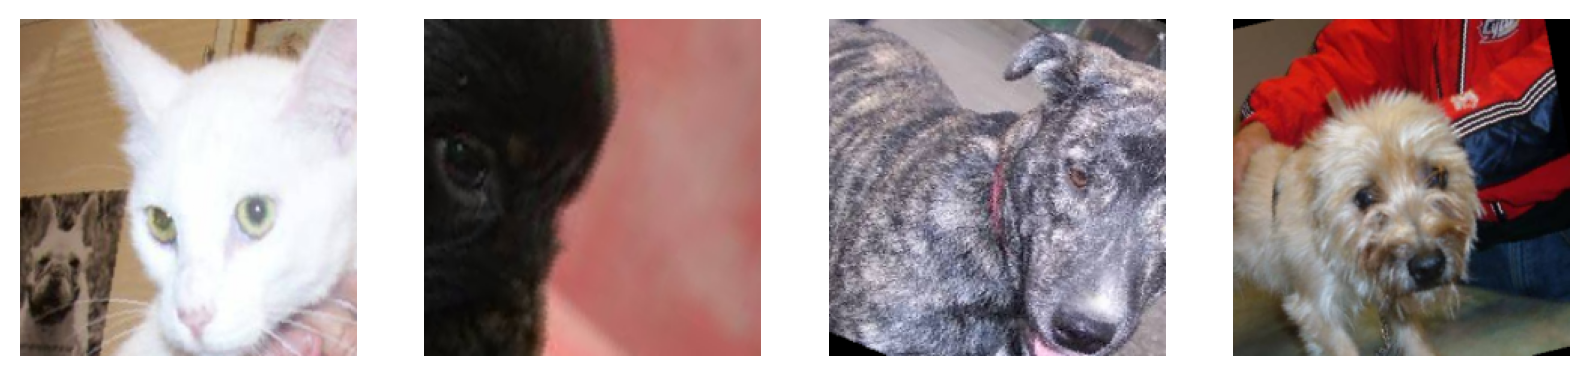

In [21]:
images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)


À ce stade, vous devriez être en mesure de charger les données pour l’entraînement et le test.  
Vous pouvez maintenant essayer de construire un réseau capable de **classer les chats et les chiens**.



In [ ]:
#  TODO: Attempt to build a network with CNN to classify cats vs dogs from this dataset
# --- créer un model from scratc


In [24]:
import torch
import torch.nn as nn

# --- Modèle CNN "from scratch" (3+ blocs conv, BN, Dropout) ---
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2, p_drop=0.3, use_bn=True):
        super().__init__()
        def block(cin, cout):
            return nn.Sequential(
                nn.Conv2d(cin, cout, kernel_size=3, padding=1),
                nn.BatchNorm2d(cout) if use_bn else nn.Identity(),
                nn.ReLU(inplace=True),
                nn.Dropout2d(p_drop),
                nn.MaxPool2d(2)  # /2
            )
        # 224 -> 112 -> 56 -> 28 -> 14
        self.features = nn.Sequential(
            block(3, 32),
            block(32, 64),
            block(64, 128),
            block(128, 256)
        )
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),  # -> 256x1x1
            nn.Flatten(),             # -> 256
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p_drop),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# --- Instanciation du modèle + critère + optimiseur ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=2, p_drop=0.3, use_bn=True).to(device)

criterion = nn.CrossEntropyLoss()

# Choisissez un des deux (consigne: tester au moins 2 optimiseurs)
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

print(model)


SimpleCNN(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Dropout2d(p=0.3, inplace=False)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Dropout2d(p=0.3, inplace=False)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Dropout2d(p=0.3, inplace

TP - CNN from scratch vs Transfert Learning (cats vs dogs)

Imports, seed, device


In [25]:
!pip -q install torch torchvision scikit-learn matplotlib tqdm

import os, math, random, json, numpy as np
import torch, torch.nn as nn, torch.optim as optim
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm

# Reproductibilité
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "| CUDA available:", torch.cuda.is_available())



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Device: cpu | CUDA available: False


In [27]:
#Data: transforms + loaders (split val clair)
DATA_ROOT = (r"C:\Users\USER\Desktop\cnn_catsdogs_MariemeFaye\Cat_Dog_data")  # adapte si besoin
train_dir = os.path.join(DATA_ROOT, "train")
test_dir  = os.path.join(DATA_ROOT, "test")

IMAGENET_MEAN=[0.485,0.456,0.406]; IMAGENET_STD=[0.229,0.224,0.225]

train_tf = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

test_tf = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
])

full_train = datasets.ImageFolder(train_dir, transform=train_tf)
classes = full_train.classes
n_train = int(0.8 * len(full_train))
n_val   = len(full_train) - n_train
train_ds, val_ds = random_split(full_train, [n_train, n_val], generator=torch.Generator().manual_seed(42))
test_ds  = datasets.ImageFolder(test_dir, transform=test_tf)

pin = (device.type == "cuda")
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True,  num_workers=2, pin_memory=pin)
valloader   = DataLoader(val_ds,   batch_size=64, shuffle=False, num_workers=2, pin_memory=pin)
testloader  = DataLoader(test_ds,  batch_size=64, shuffle=False, num_workers=2, pin_memory=pin)

len(train_ds), len(val_ds), len(test_ds), classes


(18000, 4500, 2500, ['cat', 'dog'])

# **Modèles**

In [28]:
# A) CNN from scratch (≥3 blocs conv) avec BN + Dropout
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2, p_drop=0.3, use_bn=True):
        super().__init__()
        def block(cin, cout):
            return nn.Sequential(
                nn.Conv2d(cin, cout, 3, padding=1),
                nn.BatchNorm2d(cout) if use_bn else nn.Identity(),
                nn.ReLU(inplace=True),
                nn.Dropout2d(p_drop),
                nn.MaxPool2d(2)
            )
        self.features = nn.Sequential(
            block(3,32),   # 224->112
            block(32,64),  # 112->56
            block(64,128), # 56->28
            block(128,256) # 28->14
        )
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1), nn.Flatten(),
            nn.Linear(256,128), nn.ReLU(inplace=True), nn.Dropout(p_drop),
            nn.Linear(128,num_classes)
        )
    def forward(self,x):
        return self.classifier(self.features(x))


In [29]:
#B) Transfer learning (ResNet18 par défaut)
def make_transfer(base="resnet18", num_classes=2, freeze_backbone=True):
    base = base.lower()
    if base=="resnet18":
        m = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        in_f = m.fc.in_features
        m.fc = nn.Linear(in_f, num_classes)
    elif base=="mobilenet_v3_small":
        m = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)
        in_f = m.classifier[-1].in_features
        m.classifier[-1] = nn.Linear(in_f, num_classes)
    elif base=="efficientnet_b0":
        m = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
        in_f = m.classifier[-1].in_features
        m.classifier[-1] = nn.Linear(in_f, num_classes)
    else:
        raise ValueError("Base inconnue")
    if freeze_backbone:
        for n,p in m.named_parameters(): p.requires_grad = False
        # dé-geler uniquement la tête:
        if hasattr(m,"fc"):
            for p in m.fc.parameters(): p.requires_grad=True
        elif hasattr(m,"classifier"):
            for p in m.classifier.parameters(): p.requires_grad=True
    return m


**Boucle d’entraînement + suivi métriques + sauvegarde best**

In [ ]:
def epoch_metrics(model, loader, device):
    model.eval()
    y_true=[]; y_pred=[]; total_loss=0; n=0
    crit = nn.CrossEntropyLoss()
    with torch.no_grad():
        for xb,yb in loader:
            xb,yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = crit(logits,yb)
            total_loss += loss.item()*yb.size(0); n += yb.size(0)
            y_true.extend(yb.cpu().tolist())
            y_pred.extend(logits.argmax(1).cpu().tolist())
    loss = total_loss/n
    acc  = accuracy_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred, average='binary', zero_division=0)
    rec  = recall_score(y_true,y_pred, average='binary', zero_division=0)
    return loss, acc, prec, rec

def train_model(build_fn, fn_args:dict, optimizer_name="adam", lr=1e-3, epochs=10,
                scheduler_name="steplr", step_size=5, gamma=0.5,
                ckpt_path="best.pth"):
    model = build_fn(**fn_args).to(device)
    params = filter(lambda p: p.requires_grad, model.parameters())
    if optimizer_name=="adam":
        opt = optim.Adam(params, lr=lr, weight_decay=1e-4)
    else:
        opt = optim.SGD(params, lr=lr, momentum=0.9, weight_decay=1e-4)
    if scheduler_name=="steplr":
        sched = StepLR(opt, step_size=step_size, gamma=gamma)
    elif scheduler_name=="cosine":
        sched = CosineAnnealingLR(opt, T_max=max(epochs,1))
    else:
        sched = None

    history = {"epoch":[], "train":{"loss":[],"acc":[],"prec":[],"rec":[]},
               "val":{"loss":[],"acc":[],"prec":[],"rec":[]}}
    best_val = float("inf")

    crit = nn.CrossEntropyLoss()
    for ep in range(1, epochs+1):
        model.train()
        run_loss=0; n=0
        for xb,yb in tqdm(trainloader, desc=f"Epoch {ep}/{epochs}"):
            xb,yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            logits = model(xb)
            loss = crit(logits,yb)
            loss.backward(); opt.step()
            run_loss += loss.item()*yb.size(0); n += yb.size(0)

        tr_loss, tr_acc, tr_prec, tr_rec = epoch_metrics(model, trainloader, device) #Entrainement
        va_loss, va_acc, va_prec, va_rec = epoch_metrics(model, valloader,   device) #validation

        history["epoch"].append(ep)
        for k,v in zip(["loss","acc","prec","rec"], [tr_loss,tr_acc,tr_prec,tr_rec]):
            history["train"][k].append(v)
        for k,v in zip(["loss","acc","prec","rec"], [va_loss,va_acc,va_prec,va_rec]):
            history["val"][k].append(v)

        # Mise à jour du scheduler
        if sched: sched.step()

         # Sauvegarde du meilleur modèle
        if va_loss < best_val:
            best_val = va_loss
            torch.save({"epoch":ep,"model_state":model.state_dict(),"classes":classes,
                        "cfg":{"opt":optimizer_name,"lr":lr,"sched":scheduler_name}},
                       ckpt_path)

        print(f"Ep {ep:02d} | tr_loss {tr_loss:.4f} acc {tr_acc:.3f} "
              f"| val_loss {va_loss:.4f} acc {va_acc:.3f} prec {va_prec:.3f} rec {va_rec:.3f}")

    return history, ckpt_path


# Expériences (A et B) + 2 optimiseurs

In [ ]:
set_seed(42)

# A) From scratch
# test1 : Adam
hist_A_adam, ckpt_A_adam = train_model(
    build_fn=SimpleCNN, fn_args={"num_classes":2, "p_drop":0.3, "use_bn":True},
    optimizer_name="adam", lr=1e-3, epochs=8, scheduler_name="steplr",
    step_size=4, gamma=0.5, ckpt_path="best_scratch_adam.pth"
)

# tes2 : SGD
hist_A_sgd, ckpt_A_sgd = train_model(
    build_fn=SimpleCNN, fn_args={"num_classes":2, "p_drop":0.3, "use_bn":True},
    optimizer_name="sgd", lr=0.01, epochs=8, scheduler_name="steplr",
    step_size=4, gamma=0.5, ckpt_path="best_scratch_sgd.pth"
)

# B) Transfer learning
# test1 : Adam
hist_B_adam, ckpt_B_adam = train_model(
    build_fn=make_transfer, fn_args={"base":"resnet18","num_classes":2,"freeze_backbone":True},
    optimizer_name="adam", lr=1e-3, epochs=8, scheduler_name="steplr",
    step_size=4, gamma=0.5, ckpt_path="best_transfer_adam.pth"
)

tes2 : SGD
hist_B_sgd, ckpt_B_sgd = train_model(
    build_fn=make_transfer, fn_args={"base":"resnet18","num_classes":2,"freeze_backbone":True},
    optimizer_name="sgd", lr=0.01, epochs=8, scheduler_name="steplr",
    step_size=4, gamma=0.5, ckpt_path="best_transfer_sgd.pth"
)


Epoch 1/8: 100%|██████████| 282/282 [22:36<00:00,  4.81s/it]


Ep 01 | tr_loss 0.6475 acc 0.604 | val_loss 0.6478 acc 0.606 prec 0.758 rec 0.314


Epoch 2/8: 100%|██████████| 282/282 [21:40<00:00,  4.61s/it]


Ep 02 | tr_loss 0.6323 acc 0.628 | val_loss 0.6360 acc 0.624 prec 0.742 rec 0.381


Epoch 3/8: 100%|██████████| 282/282 [21:46<00:00,  4.63s/it]


Ep 03 | tr_loss 0.6224 acc 0.643 | val_loss 0.6261 acc 0.639 prec 0.770 rec 0.399


Epoch 4/8: 100%|██████████| 282/282 [21:09<00:00,  4.50s/it]


Ep 04 | tr_loss 0.6200 acc 0.657 | val_loss 0.6252 acc 0.646 prec 0.718 rec 0.482


Epoch 5/8: 100%|██████████| 282/282 [21:42<00:00,  4.62s/it]


Ep 05 | tr_loss 0.5981 acc 0.685 | val_loss 0.6040 acc 0.678 prec 0.782 rec 0.496


Epoch 6/8: 100%|██████████| 282/282 [21:40<00:00,  4.61s/it]


Ep 06 | tr_loss 0.5868 acc 0.687 | val_loss 0.5938 acc 0.680 prec 0.779 rec 0.506


Epoch 7/8: 100%|██████████| 282/282 [21:42<00:00,  4.62s/it]


Ep 07 | tr_loss 0.5816 acc 0.702 | val_loss 0.5889 acc 0.698 prec 0.799 rec 0.530


Epoch 8/8: 100%|██████████| 282/282 [28:13<00:00,  6.01s/it]


Ep 08 | tr_loss 0.5700 acc 0.699 | val_loss 0.5793 acc 0.689 prec 0.795 rec 0.511


Epoch 1/8: 100%|██████████| 282/282 [3:39:05<00:00, 46.61s/it]     


Ep 01 | tr_loss 0.6605 acc 0.586 | val_loss 0.6614 acc 0.584 prec 0.783 rec 0.235


Epoch 2/8: 100%|██████████| 282/282 [23:32<00:00,  5.01s/it]


Ep 02 | tr_loss 0.6809 acc 0.561 | val_loss 0.6850 acc 0.558 prec 0.878 rec 0.137


Epoch 3/8: 100%|██████████| 282/282 [23:38<00:00,  5.03s/it]


Ep 03 | tr_loss 0.6550 acc 0.592 | val_loss 0.6581 acc 0.593 prec 0.858 rec 0.225


Epoch 4/8: 100%|██████████| 282/282 [23:09<00:00,  4.93s/it]


Ep 04 | tr_loss 0.6743 acc 0.548 | val_loss 0.6800 acc 0.542 prec 0.925 rec 0.094


Epoch 5/8: 100%|██████████| 282/282 [23:15<00:00,  4.95s/it]


Ep 05 | tr_loss 0.6839 acc 0.566 | val_loss 0.6914 acc 0.562 prec 0.892 rec 0.143


Epoch 6/8: 100%|██████████| 282/282 [23:05<00:00,  4.91s/it]


Ep 06 | tr_loss 0.6520 acc 0.587 | val_loss 0.6577 acc 0.583 prec 0.913 rec 0.185


Epoch 7/8: 100%|██████████| 282/282 [23:10<00:00,  4.93s/it]


Ep 07 | tr_loss 0.6717 acc 0.588 | val_loss 0.6803 acc 0.577 prec 0.857 rec 0.186


Epoch 8/8: 100%|██████████| 282/282 [23:00<00:00,  4.90s/it]


Ep 08 | tr_loss 0.6605 acc 0.578 | val_loss 0.6691 acc 0.573 prec 0.930 rec 0.160


Epoch 1/8: 100%|██████████| 282/282 [13:31<00:00,  2.88s/it]


Ep 01 | tr_loss 0.0788 acc 0.970 | val_loss 0.0802 acc 0.970 prec 0.958 rec 0.984


Epoch 2/8: 100%|██████████| 282/282 [13:36<00:00,  2.89s/it]


Ep 02 | tr_loss 0.0655 acc 0.975 | val_loss 0.0708 acc 0.970 prec 0.978 rec 0.961


Epoch 3/8: 100%|██████████| 282/282 [13:39<00:00,  2.91s/it]


Ep 03 | tr_loss 0.0816 acc 0.968 | val_loss 0.0865 acc 0.963 prec 0.991 rec 0.934


Epoch 4/8: 100%|██████████| 282/282 [13:46<00:00,  2.93s/it]


Ep 04 | tr_loss 0.0619 acc 0.977 | val_loss 0.0674 acc 0.972 prec 0.986 rec 0.957


Epoch 5/8: 100%|██████████| 282/282 [13:48<00:00,  2.94s/it]


Ep 05 | tr_loss 0.0548 acc 0.979 | val_loss 0.0619 acc 0.975 prec 0.978 rec 0.972


Epoch 6/8: 100%|██████████| 282/282 [13:48<00:00,  2.94s/it]


Ep 06 | tr_loss 0.0564 acc 0.979 | val_loss 0.0563 acc 0.979 prec 0.978 rec 0.980


Epoch 7/8: 100%|██████████| 282/282 [13:43<00:00,  2.92s/it]


Ep 07 | tr_loss 0.0539 acc 0.979 | val_loss 0.0561 acc 0.978 prec 0.985 rec 0.970


Epoch 8/8: 100%|██████████| 282/282 [13:46<00:00,  2.93s/it]


Ep 08 | tr_loss 0.0540 acc 0.979 | val_loss 0.0563 acc 0.980 prec 0.975 rec 0.985


Epoch 1/8: 100%|██████████| 282/282 [2:29:56<00:00, 31.90s/it]     


Ep 01 | tr_loss 0.0582 acc 0.977 | val_loss 0.0659 acc 0.975 prec 0.970 rec 0.980


Epoch 2/8: 100%|██████████| 282/282 [13:54<00:00,  2.96s/it]


Ep 02 | tr_loss 0.1171 acc 0.958 | val_loss 0.1265 acc 0.957 prec 0.925 rec 0.996


Epoch 3/8: 100%|██████████| 282/282 [13:48<00:00,  2.94s/it]


Ep 03 | tr_loss 0.0529 acc 0.979 | val_loss 0.0606 acc 0.975 prec 0.969 rec 0.981


Epoch 4/8: 100%|██████████| 282/282 [14:33<00:00,  3.10s/it]


Ep 04 | tr_loss 0.0830 acc 0.968 | val_loss 0.0934 acc 0.964 prec 0.994 rec 0.934


Epoch 5/8: 100%|██████████| 282/282 [14:29<00:00,  3.08s/it]


Ep 05 | tr_loss 0.0479 acc 0.982 | val_loss 0.0585 acc 0.978 prec 0.974 rec 0.981


Epoch 6/8: 100%|██████████| 282/282 [14:23<00:00,  3.06s/it]


Ep 06 | tr_loss 0.0488 acc 0.982 | val_loss 0.0558 acc 0.980 prec 0.975 rec 0.985


Epoch 7/8: 100%|██████████| 282/282 [14:18<00:00,  3.04s/it]


Ep 07 | tr_loss 0.0568 acc 0.977 | val_loss 0.0650 acc 0.975 prec 0.963 rec 0.988


Epoch 8/8: 100%|██████████| 282/282 [14:17<00:00,  3.04s/it]


Ep 08 | tr_loss 0.0471 acc 0.981 | val_loss 0.0548 acc 0.979 prec 0.977 rec 0.981


# Courbes (loss/acc/prec/rec) pour A vs B

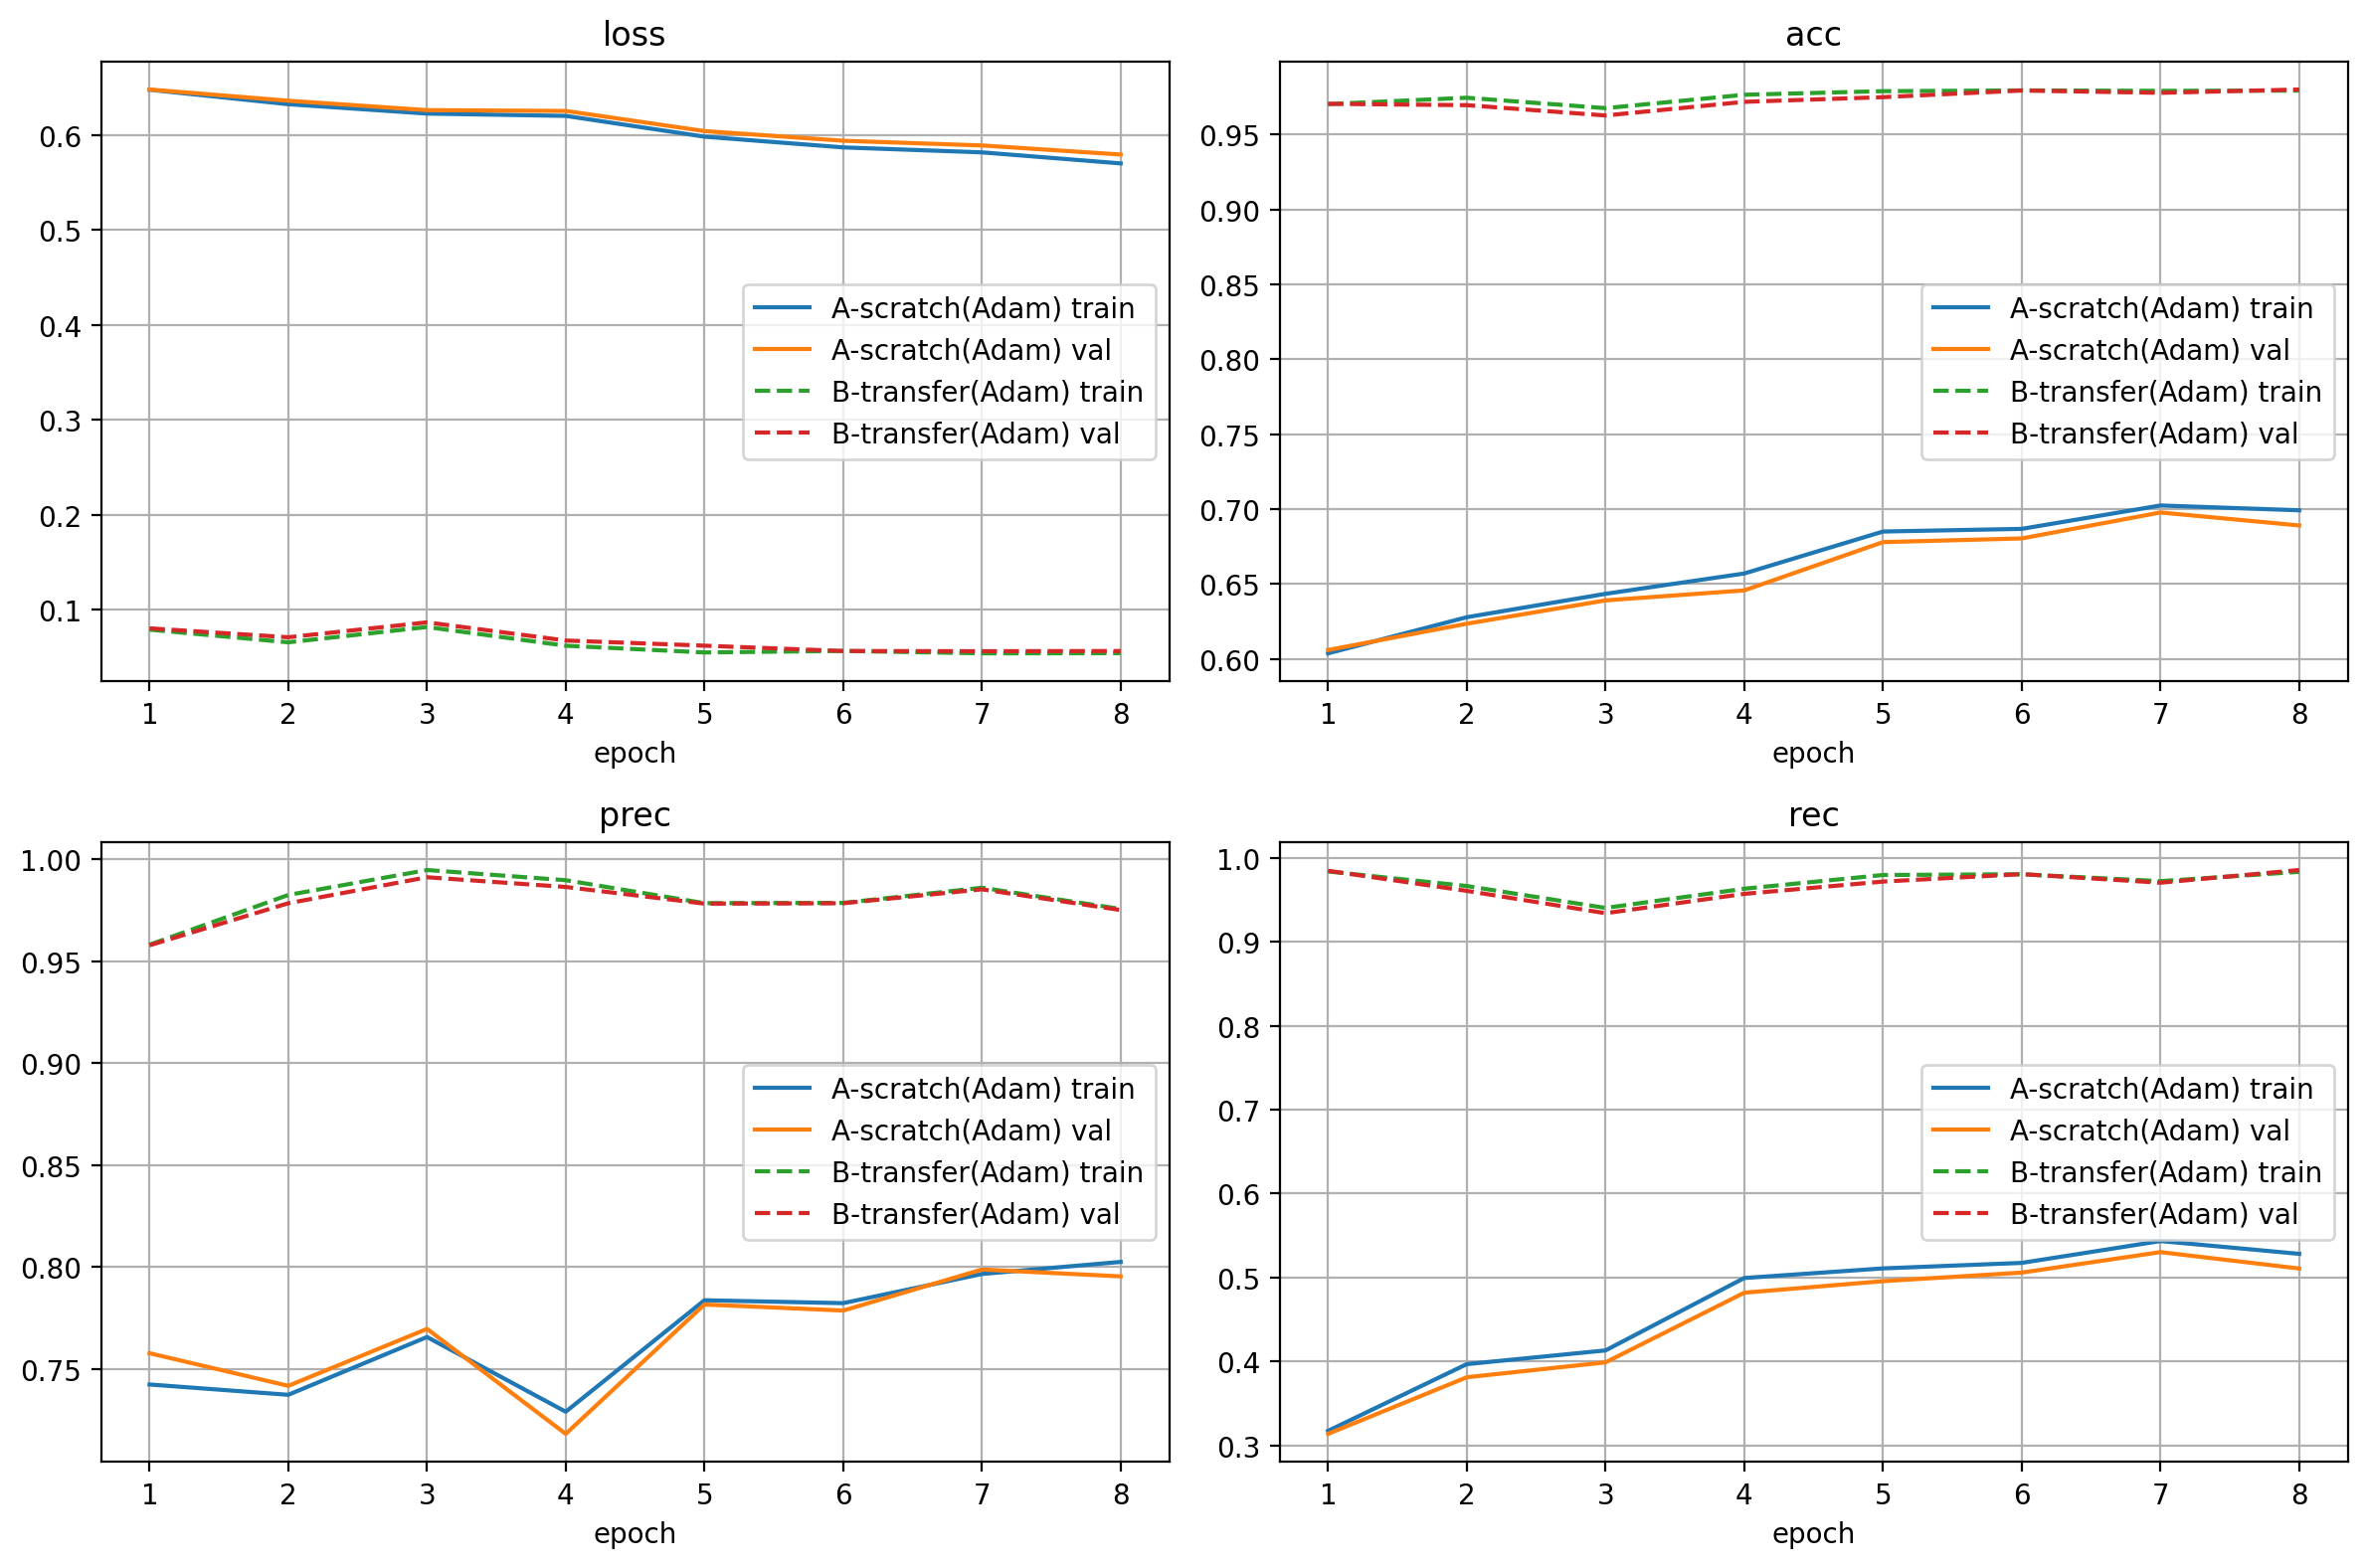

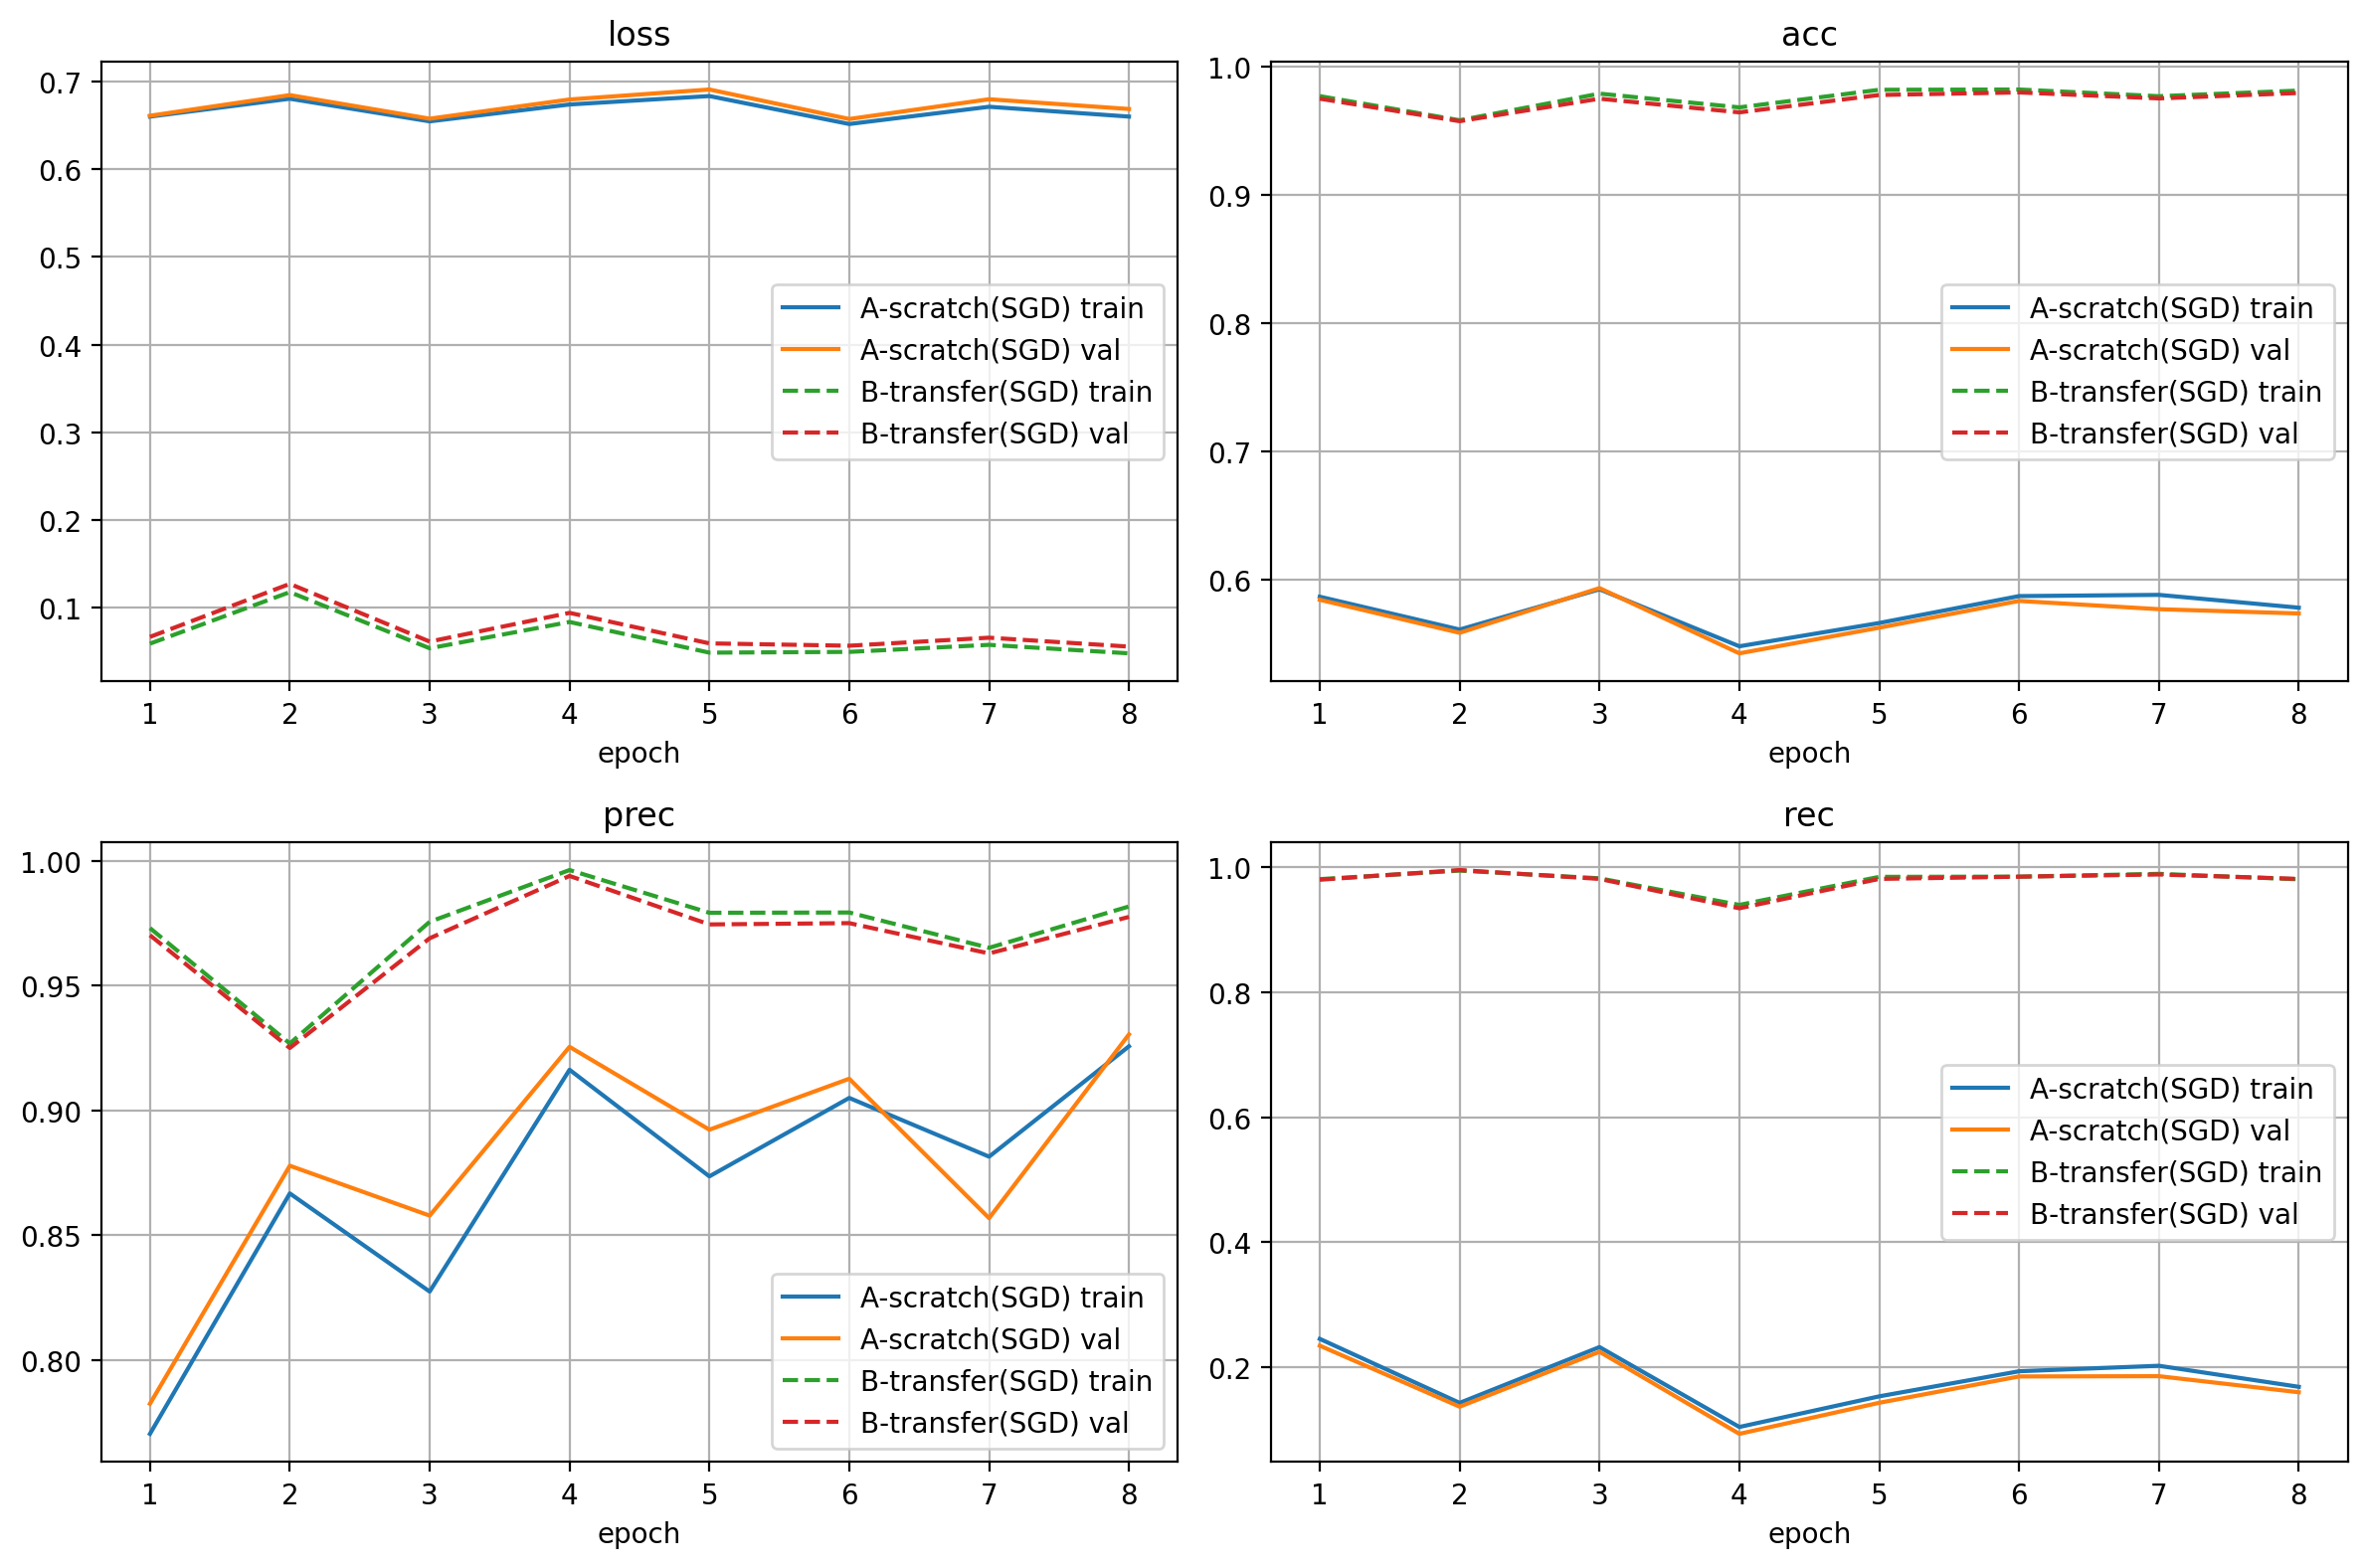

In [33]:
def plot_history(h1, h2, title1="A (scratch)", title2="B (transfer)"):
    fig, axes = plt.subplots(2,2, figsize=(12,8))
    metrics = ["loss","acc","prec","rec"]
    for ax, metric in zip(axes.ravel(), metrics):
        ax.plot(h1["epoch"], h1["train"][metric], label=f"{title1} train")
        ax.plot(h1["epoch"], h1["val"][metric],   label=f"{title1} val")
        ax.plot(h2["epoch"], h2["train"][metric], label=f"{title2} train", linestyle="--")
        ax.plot(h2["epoch"], h2["val"][metric],   label=f"{title2} val",   linestyle="--")
        ax.set_title(metric); ax.set_xlabel("epoch"); ax.grid(True); ax.legend()
    plt.tight_layout(); plt.show()

plot_history(hist_A_adam, hist_B_adam, "A-scratch(Adam)","B-transfer(Adam)")
plot_history(hist_A_sgd,  hist_B_sgd,  "A-scratch(SGD)", "B-transfer(SGD)")


# Rechargement du meilleur checkpoint & métriques test + matrice de confusion + erreurs typiques

Meilleur SCRATCH  : best_scratch_adam.pth  | Adam (epoch=8, best val_loss=0.5793)
Meilleur TRANSFER  : best_transfer_sgd.pth | SGD (epoch=8, best val_loss=0.0548)
[Scratch] Test: loss=0.6013 | acc=0.659 | prec=0.836 | rec=0.396


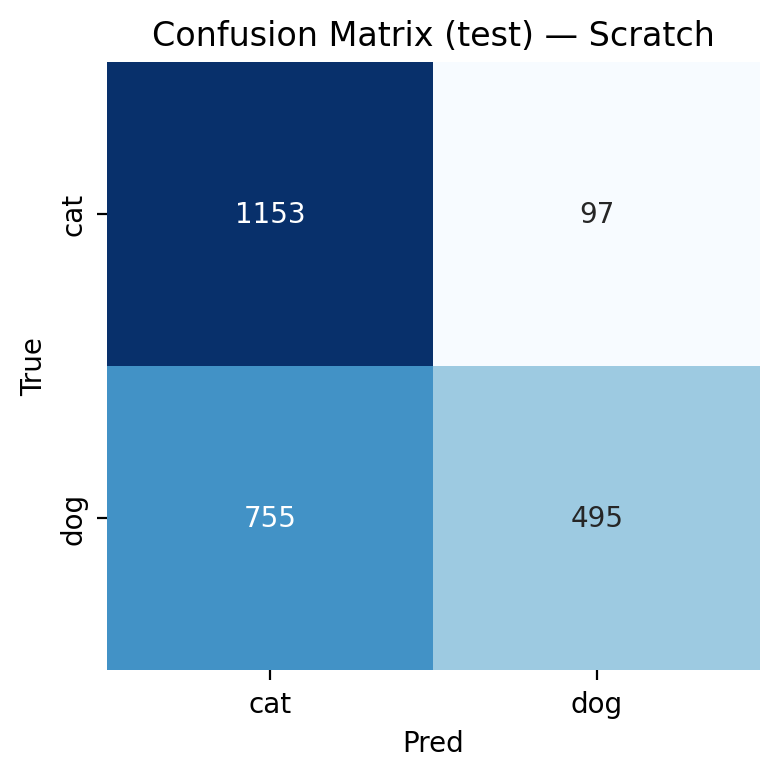

[Transfer] Test: loss=0.0482 | acc=0.982 | prec=0.982 | rec=0.982


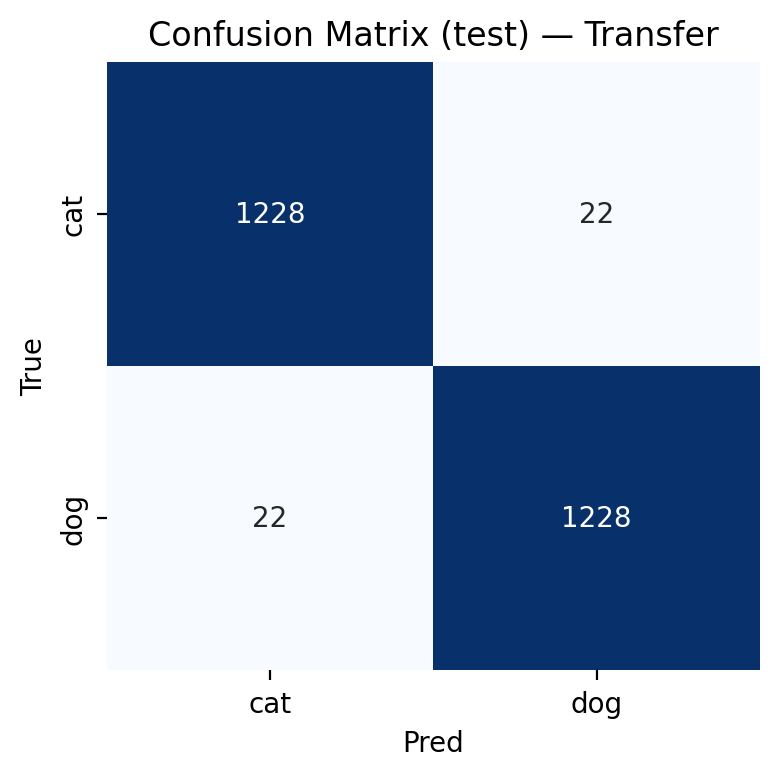

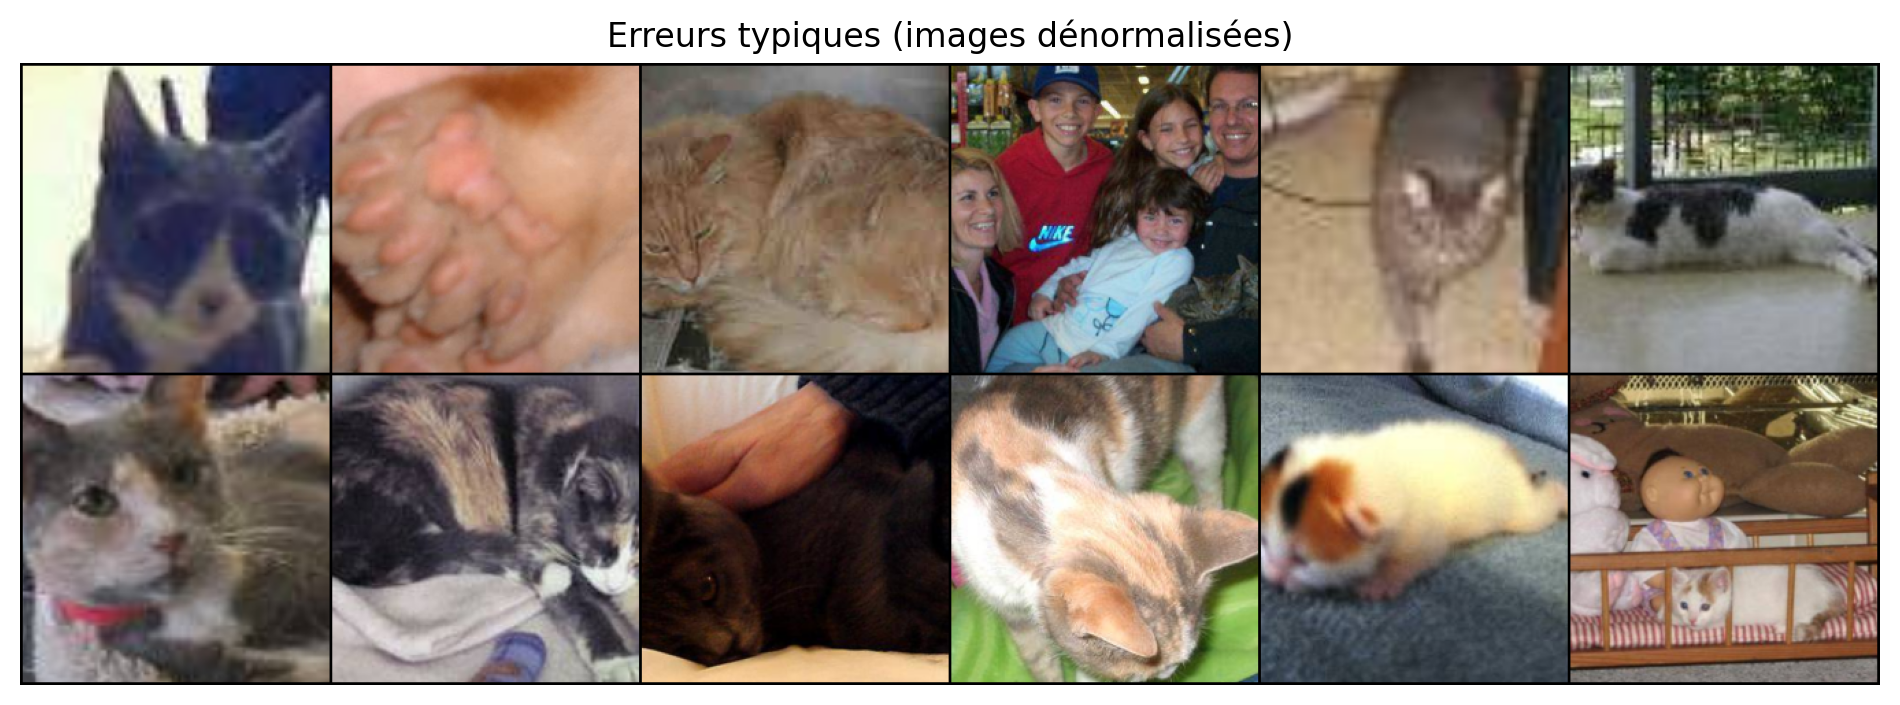

pred -> ['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog']
true -> ['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']


In [ ]:
# ÉVAL pour 4 EXPÉRIENCES 
import torch, torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- utilitaires ---

def best_idx_from_history(hist):
    """Index (0-based) où la val_loss est minimale."""
    vals = hist["val"]["loss"]
    return int(min(range(len(vals)), key=lambda i: vals[i]))

def pick_best_ckpt_among_two(hist_a, ckpt_a, name_a,
                             hist_b, ckpt_b, name_b):
    """
    Compare deux runs et renvoie (ckpt_choisi, description lisible).
    name_a/name_b servent juste à imprimer lequel a gagné (ex: 'Adam', 'SGD').
    """
    i_a = best_idx_from_history(hist_a)
    i_b = best_idx_from_history(hist_b)
    best_a = hist_a["val"]["loss"][i_a]
    best_b = hist_b["val"]["loss"][i_b]
    if best_a <= best_b:
        return ckpt_a, f"{name_a} (epoch={i_a+1}, best val_loss={best_a:.4f})"
    else:
        return ckpt_b, f"{name_b} (epoch={i_b+1}, best val_loss={best_b:.4f})"

def load_model_for_eval(ckpt_path, exp):
    ckpt = torch.load(ckpt_path, map_location=device)
    if exp == "scratch":
        model = SimpleCNN(num_classes=2, p_drop=0.3, use_bn=True)
    else:  # transfer
        # on évalue en autorisant tout le réseau 
        model = make_transfer("resnet18", num_classes=2, freeze_backbone=False)
    model.load_state_dict(ckpt["model_state"])
    model.to(device).eval()
    return model

@torch.no_grad()
def evaluate_on_test(model, loader):
    y_true, y_pred = [], []
    crit = nn.CrossEntropyLoss()
    total, n = 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb)
        loss = crit(logits, yb)
        total += loss.item() * yb.size(0); n += yb.size(0)
        y_true.extend(yb.cpu().tolist())
        y_pred.extend(logits.argmax(1).cpu().tolist())
    loss = total / max(n, 1)
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    cm   = confusion_matrix(y_true, y_pred)
    return loss, acc, prec, rec, cm, y_true, y_pred

def show_confusion_matrix(cm, labels, title="Confusion Matrix (test)"):
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel("Pred"); plt.ylabel("True"); plt.title(title)
    plt.tight_layout(); plt.show()

# --- dénormalisation pour un rendu correct des images (ImageNet stats) ---
IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)

def denorm_batch(batch):
    # batch: (B,C,H,W) normalisé
    return (batch * IMAGENET_STD) + IMAGENET_MEAN

def show_misclassified(model, loader, labels, k=12, denorm=True):
    import torchvision
    model.eval()
    ims, preds, trues = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            logits = model(xb.to(device))
            yhat = logits.argmax(1).cpu()
            sel = (yhat != yb)
            if sel.any():
                ims.append(xb[sel]); preds.extend(yhat[sel].tolist()); trues.extend(yb[sel].tolist())
            if sum(t.size(0) for t in ims) >= k:
                break
    if not ims:
        print("Pas d'erreurs trouvées sur ce batch."); return
    batch = torch.cat(ims, dim=0)[:k]
    if denorm:
        batch = denorm_batch(batch).clamp(0,1)
        title = "Erreurs typiques (images dénormalisées)"
    else:
        title = "Erreurs typiques (images non dénormalisées)"
    grid = torchvision.utils.make_grid(batch, nrow=min(6, k))
    plt.figure(figsize=(12,5)); plt.imshow(grid.permute(1,2,0)); plt.axis('off'); plt.title(title); plt.show()
    print("pred ->", [labels[i] for i in preds[:k]])
    print("true ->", [labels[i] for i in trues[:k]])

# --- récupère les classes si besoin ---
if "classes" not in globals():
    try:
        classes = test_data.classes
    except Exception:
        classes = ["cat", "dog"]

# --- choisit le meilleur checkpoint SCRATCH (Adam vs SGD) ---
ckpt_best_scratch, info_scratch = pick_best_ckpt_among_two(
    hist_A_adam, ckpt_A_adam, "Adam",
    hist_A_sgd,  ckpt_A_sgd,  "SGD"
)

# --- choisit le meilleur checkpoint TRANSFER (Adam vs SGD) ---
ckpt_best_transfer, info_transfer = pick_best_ckpt_among_two(
    hist_B_adam, ckpt_B_adam, "Adam",
    hist_B_sgd,  ckpt_B_sgd,  "SGD"
)

print(f"Meilleur SCRATCH  : {ckpt_best_scratch}  | {info_scratch}")
print(f"Meilleur TRANSFER  : {ckpt_best_transfer} | {info_transfer}")

# --- recharge modèles gagnants ---
m_scratch  = load_model_for_eval(ckpt_best_scratch,  exp="scratch")
m_transfer = load_model_for_eval(ckpt_best_transfer, exp="transfer")

# --- évalue sur TEST + matrices de confusion ---
for name, model in [("Scratch", m_scratch), ("Transfer", m_transfer)]:
    t_loss, t_acc, t_prec, t_rec, cm, y_true, y_pred = evaluate_on_test(model, testloader)
    print(f"[{name}] Test: loss={t_loss:.4f} | acc={t_acc:.3f} | prec={t_prec:.3f} | rec={t_rec:.3f}")
    show_confusion_matrix(cm, classes, title=f"Confusion Matrix (test) — {name}")

# --- erreurs typiques (version dénormalisée pour bien voir les couleurs) ---
show_misclassified(m_transfer, testloader, classes, k=12, denorm=True)
